### BLACK LITTERMAN MODEL 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.optimize as sci_plt
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
import os 
from pprint import pprint
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation
os.chdir('C://MyPython')

In [2]:
portfolio = pd.read_csv('PROJECT WORK DATA.csv',infer_datetime_format=True,index_col=0)

In [3]:
portfolio.head()

,BOPP,CAL,CMLT,CPC,GCB,GGBL,SIC,SOGEGH,TOTAL,TLW
Daily Date,,,,,,,,,,
28-3-2024,21.53,0.42,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92
27-3-2024,21.53,0.42,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92
26-3-2024,21.53,0.46,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92
25-3-2024,21.53,0.46,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92
22-3-2024,21.53,0.47,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92


In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2526 entries, 28-3-2024 to 2/1/2014
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOPP    2526 non-null   float64
 1   CAL     2526 non-null   float64
 2   CMLT    2526 non-null   float64
 3   CPC     2526 non-null   float64
 4   GCB     1894 non-null   float64
 5   GGBL    2526 non-null   float64
 6   SIC     2526 non-null   float64
 7   SOGEGH  2526 non-null   float64
 8   TOTAL   2526 non-null   float64
 9   TLW     2526 non-null   float64
dtypes: float64(10)
memory usage: 217.1+ KB


In [5]:
portfolio.isnull().sum()

BOPP        0
CAL         0
CMLT        0
CPC         0
GCB       632
GGBL        0
SIC         0
SOGEGH      0
TOTAL       0
TLW         0
dtype: int64

In [6]:
portfolio['GCB'].fillna(portfolio['GCB'].mean(), inplace=True)
portfolio.isnull().sum()

BOPP      0
CAL       0
CMLT      0
CPC       0
GCB       0
GGBL      0
SIC       0
SOGEGH    0
TOTAL     0
TLW       0
dtype: int64

In [7]:
market_prices  = pd.read_csv('GSE COMPOSITE INDEX.csv',index_col=0, parse_dates=True)

In [8]:
print(market_prices.head())

            Unnamed: 1
Dates                 
2024-02-28        3390
2024-02-27        3430
2024-02-26        3480
2024-02-25        3480
2024-02-23        3585


In [9]:
#Calculate Sigma and Delta to get implied market returns
#Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O?
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()
S

,BOPP,CAL,CMLT,CPC,GCB,GGBL,SIC,SOGEGH,TOTAL,TLW
BOPP,0.414328,-0.054338,0.002981,0.000490,-0.028264,0.113715,-0.045953,0.102023,0.208302,0.000145
CAL,-0.054338,0.172484,0.001374,-0.002678,0.006827,-0.024228,0.009668,-0.021755,-0.040447,0.000195
CMLT,0.002981,0.001374,0.081839,-0.000116,-0.000168,0.000323,0.001692,0.000499,-0.000193,0.000010
CPC,0.000490,-0.002678,-0.000116,1.297809,0.014017,0.013659,0.029081,-0.009913,-0.002530,0.004206
GCB,-0.028264,0.006827,-0.000168,0.014017,0.104329,-0.011704,0.005954,-0.011538,-0.020240,0.000191
GGBL,0.113715,-0.024228,0.000323,0.013659,-0.011704,0.152901,-0.019397,0.043675,0.083381,0.000038
SIC,-0.045953,0.009668,0.001692,0.029081,0.005954,-0.019397,0.221496,-0.014769,-0.038127,0.000138
SOGEGH,0.102023,-0.021755,0.000499,-0.009913,-0.011538,0.043675,-0.014769,0.153767,0.073642,-0.000322
TOTAL,0.208302,-0.040447,-0.000193,-0.002530,-0.020240,0.083381,-0.038127,0.073642,0.273005,-0.000178
TLW,0.000145,0.000195,0.000010,0.004206,0.000191,0.000038,0.000138,-0.000322,-0.000178,0.079146


In [10]:
delta = black_litterman.market_implied_risk_aversion(market_prices['Unnamed: 1'])
print(delta)

0.2231349865364395


<AxesSubplot:>

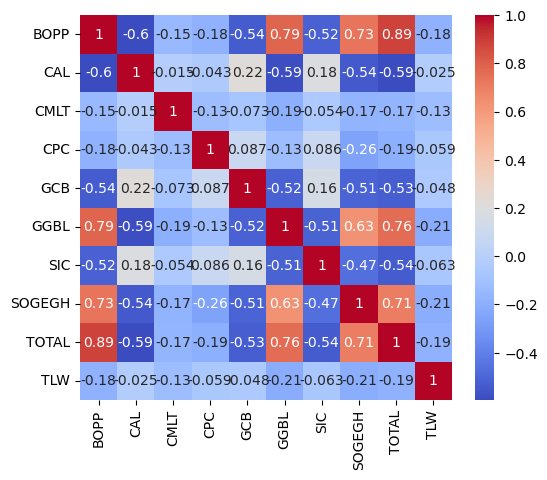

In [11]:
#Visualize the Covariant Correlation
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(S.corr(),cmap ='coolwarm',annot = True)

In [12]:
mcaps = {'BOPP':335820000,'CAL':319560000,'CMLT':68000000,
        'CPC':68000000,'GCB':834750000,
        'GGBL':516760000,'SIC':60650000,
        'SOGEGH':638230000,'TOTAL':465400000,
         'TLW':17163880000}

In [13]:
mcaps

{'BOPP': 335820000,
 'CAL': 319560000,
 'CMLT': 68000000,
 'CPC': 68000000,
 'GCB': 834750000,
 'GGBL': 516760000,
 'SIC': 60650000,
 'SOGEGH': 638230000,
 'TOTAL': 465400000,
 'TLW': 17163880000}

In [14]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)


In [15]:
market_prior

BOPP      0.023476
CAL       0.020013
CMLT      0.020082
CPC       0.021883
GCB       0.020671
GGBL      0.021818
SIC       0.019709
SOGEGH    0.021805
TOTAL     0.022744
TLW       0.034810
dtype: float64

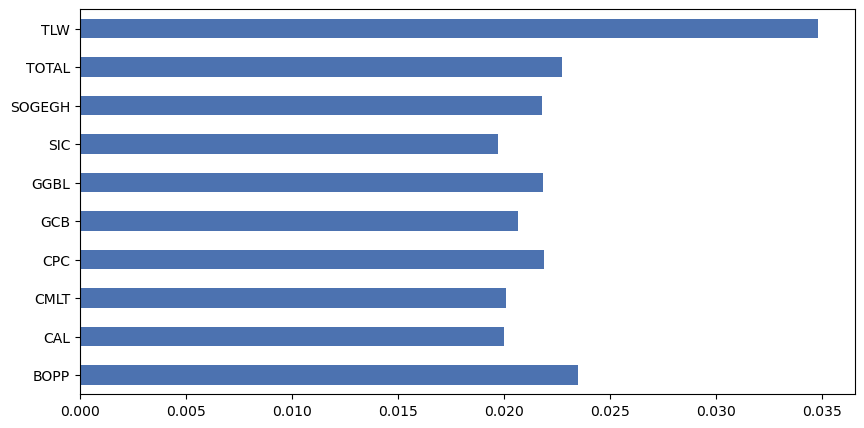

In [16]:
market_prior.plot.barh(figsize=(10,5));

In [17]:
#You don't have to provide views on all the assets
viewdict = {'BOPP':-0.02,'CAL':-0.11,'CMLT':-0.1,
           'CPC':-0.33,'GCB':0.003,
           'GGBL':0.3,'SIC':0.2,
           'SOGEGH':0.09,'TOTAL':0.05,'TLW':-0.002}

In [18]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3)]

In [19]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225]


In [20]:
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [21]:
ret_bl = bl.bl_returns()
ret_bl

BOPP      0.069456
CAL      -0.046392
CMLT     -0.019803
CPC      -0.299868
GCB      -0.002457
GGBL      0.217453
SIC       0.157135
SOGEGH    0.087321
TOTAL     0.074869
TLW       0.011358
dtype: float64

In [22]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Market_Returns", "BL_Assets_Returns", "Views"]).T
rets_df

,Market_Returns,BL_Assets_Returns,Views
BOPP,0.023476,0.069456,-0.020
CAL,0.020013,-0.046392,-0.110
CMLT,0.020082,-0.019803,-0.100
CPC,0.021883,-0.299868,-0.330
GCB,0.020671,-0.002457,0.003
GGBL,0.021818,0.217453,0.300
SIC,0.019709,0.157135,0.200
SOGEGH,0.021805,0.087321,0.090
TOTAL,0.022744,0.074869,0.050
TLW,0.034810,0.011358,-0.002


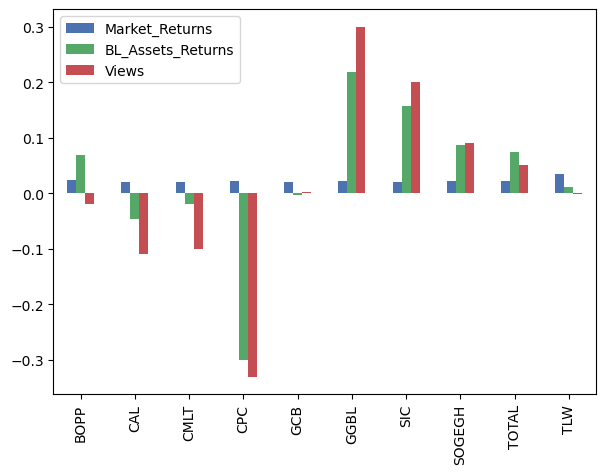

In [23]:
rets_df.plot.bar(figsize=(7,5));

In [56]:
ef = EfficientFrontier(ret_bl, S)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

C:\Users\USER\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('BOPP', 0.04528),
             ('CAL', 0.0),
             ('CMLT', 0.0),
             ('CPC', 0.0),
             ('GCB', 0.0),
             ('GGBL', 0.43856),
             ('SIC', 0.3067),
             ('SOGEGH', 0.13112),
             ('TOTAL', 0.07834),
             ('TLW', 0.0)])

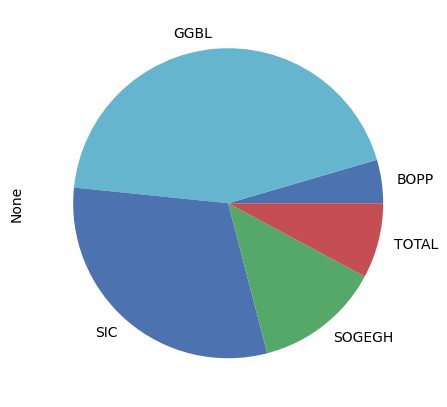

In [57]:
pd.Series(weights).plot.pie(figsize=(5,6));

C:\Users\USER\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Expected annual return: 16.4%
Annual volatility: 25.6%
Sharpe Ratio: 0.56


C:\Users\USER\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.16401943571703137, 0.25567252091541337, 0.5632964981977032)

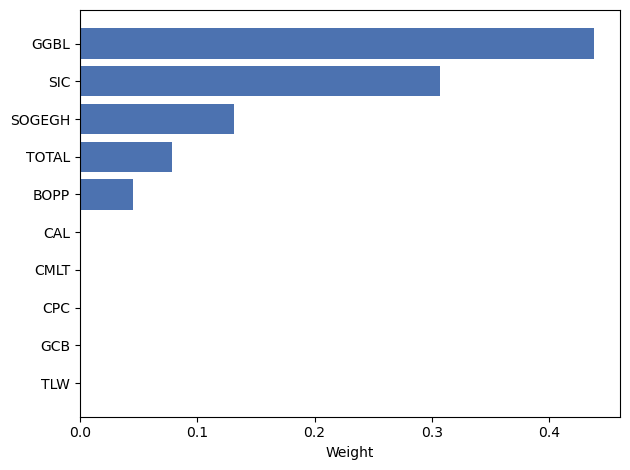

In [26]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.25)

### MEAN VARIANCE PORTFOLIO MODEL

In [27]:
import math

In [28]:
portfolio1 = pd.read_csv('PROJECT WORK DATA.csv',infer_datetime_format=True,index_col=0)

In [29]:
portfolio1.head()

,BOPP,CAL,CMLT,CPC,GCB,GGBL,SIC,SOGEGH,TOTAL,TLW
Daily Date,,,,,,,,,,
28-3-2024,21.53,0.42,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92
27-3-2024,21.53,0.42,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92
26-3-2024,21.53,0.46,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92
25-3-2024,21.53,0.46,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92
22-3-2024,21.53,0.47,0.1,0.02,3.43,4.44,0.24,1.57,9.5,11.92


In [30]:
round(portfolio1.describe(),2)

,BOPP,CAL,CMLT,CPC,GCB,GGBL,SIC,SOGEGH,TOTAL,TLW
count,2526.00,2526.00,2526.00,2526.00,1894.00,2526.00,2526.00,2526.00,2526.00,2526.00
mean,5.51,0.86,0.11,0.02,4.41,2.28,0.20,0.94,4.54,18.80
std,4.49,0.22,0.02,0.00,0.73,1.09,0.11,0.32,1.79,8.91
min,2.00,0.42,0.09,0.01,2.95,0.90,0.07,0.57,1.97,11.92
25%,2.85,0.74,0.10,0.02,3.76,1.60,0.10,0.73,3.00,11.92
50%,4.10,0.84,0.11,0.02,4.50,2.05,0.15,0.84,4.25,11.94
75%,6.34,0.99,0.12,0.02,5.06,2.55,0.26,1.03,5.46,27.88
max,22.00,1.97,0.16,0.03,5.85,6.20,0.52,2.40,9.50,36.00


In [48]:
round(portfolio1.corr(),3)

,BOPP,CAL,CMLT,CPC,GCB,GGBL,SIC,SOGEGH,TOTAL,TLW
BOPP,1.000,-0.335,-0.244,-0.051,-0.546,0.281,0.259,0.521,0.729,-0.322
CAL,-0.335,1.000,0.504,-0.219,0.170,0.169,0.255,0.357,-0.094,0.279
CMLT,-0.244,0.504,1.000,-0.148,0.009,0.525,0.546,0.275,0.101,0.604
CPC,-0.051,-0.219,-0.148,1.000,0.006,-0.259,-0.246,-0.080,-0.263,-0.468
GCB,-0.546,0.170,0.009,0.006,1.000,-0.200,-0.381,-0.216,-0.455,0.113
GGBL,0.281,0.169,0.525,-0.259,-0.200,1.000,0.694,0.337,0.642,0.470
SIC,0.259,0.255,0.546,-0.246,-0.381,0.694,1.000,0.447,0.501,0.357
SOGEGH,0.521,0.357,0.275,-0.080,-0.216,0.337,0.447,1.000,0.539,-0.122
TOTAL,0.729,-0.094,0.101,-0.263,-0.455,0.642,0.501,0.539,1.000,0.171
TLW,-0.322,0.279,0.604,-0.468,0.113,0.470,0.357,-0.122,0.171,1.000


In [32]:
portfolio1.isna().sum()

BOPP        0
CAL         0
CMLT        0
CPC         0
GCB       632
GGBL        0
SIC         0
SOGEGH      0
TOTAL       0
TLW         0
dtype: int64

In [33]:
portfolio1["GCB"] = portfolio1["GCB"].replace(np.NaN, portfolio1["GCB"].mean())
portfolio1.isna().sum()

BOPP      0
CAL       0
CMLT      0
CPC       0
GCB       0
GGBL      0
SIC       0
SOGEGH    0
TOTAL     0
TLW       0
dtype: int64

In [34]:
daily_simple_returns = portfolio1.pct_change(1).dropna()
daily_simple_returns

,BOPP,CAL,CMLT,CPC,GCB,GGBL,SIC,SOGEGH,TOTAL,TLW
Daily Date,,,,,,,,,,
27-3-2024,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
26-3-2024,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
25-3-2024,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
22-3-2024,0.0,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
21-3-2024,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
8/1/2014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7/1/2014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.001988,0.0
6/1/2014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [35]:
annual_returns = daily_simple_returns.mean()*252
annual_returns

BOPP     -0.036102
CAL       0.151844
CMLT      0.058725
CPC       0.632079
GCB       0.053883
GGBL      0.086705
SIC       0.148396
SOGEGH   -0.018264
TOTAL     0.045103
TLW       0.117206
dtype: float64

In [36]:
annual_risks = daily_simple_returns.std() * math.sqrt(252)
annual_risks

BOPP      0.668262
CAL       0.373569
CMLT      0.156464
CPC       1.252256
GCB       0.230288
GGBL      0.338665
SIC       0.449193
SOGEGH    0.340283
TOTAL     0.516880
TLW       0.145131
dtype: float64

In [37]:
sorted_annualized_returns = annual_returns.sort_values(ascending = False)
sorted_annualized_returns

CPC       0.632079
CAL       0.151844
SIC       0.148396
TLW       0.117206
GGBL      0.086705
CMLT      0.058725
GCB       0.053883
TOTAL     0.045103
SOGEGH   -0.018264
BOPP     -0.036102
dtype: float64

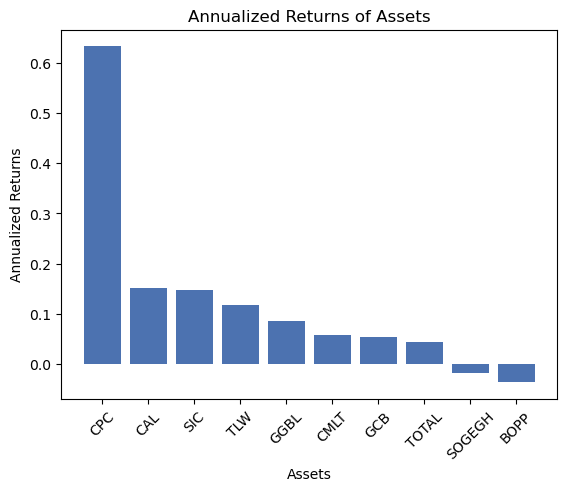

In [38]:
plt.bar(sorted_annualized_returns.index, sorted_annualized_returns)
plt.ylabel("Annualized Returns")
plt.xlabel("Assets")
plt.xticks(rotation = 45)
plt.title("Annualized Returns of Assets")
plt.show()

In [39]:
df2 = pd.DataFrame()
df2['Expected Annual Returns'] = annual_returns
df2['Expected Annual Risks'] = annual_risks
df2['Company Tickers'] = df2.index
df2['Sharpe_Ratio'] = df2['Expected Annual Returns'] / df2['Expected Annual Risks']
#Show the data sorted in descednding order for the expected annual returns
df2.sort_values(by='Sharpe_Ratio', axis = 0, ascending = False, inplace = False)

#The Ratio shows how much annual returns there is compared to annual risks

,Expected Annual Returns,Expected Annual Risks,Company Tickers,Sharpe_Ratio
TLW,0.117206,0.145131,TLW,0.807592
CPC,0.632079,1.252256,CPC,0.504752
CAL,0.151844,0.373569,CAL,0.406467
CMLT,0.058725,0.156464,CMLT,0.375326
SIC,0.148396,0.449193,SIC,0.330361
GGBL,0.086705,0.338665,GGBL,0.256021
GCB,0.053883,0.230288,GCB,0.233981
TOTAL,0.045103,0.516880,TOTAL,0.087261
SOGEGH,-0.018264,0.340283,SOGEGH,-0.053674
BOPP,-0.036102,0.668262,BOPP,-0.054023


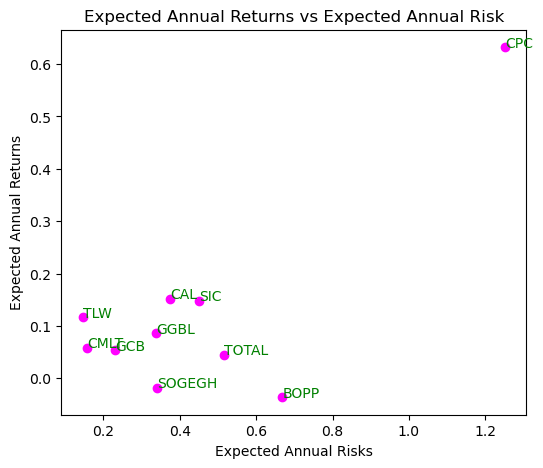

In [40]:
fig, ax = plt.subplots(figsize = (6,5))
plt.title("Expected Annual Returns vs Expected Annual Risk")
ax.scatter(df2['Expected Annual Risks'], df2['Expected Annual Returns'], c = 'magenta')
ax.set_xlabel('Expected Annual Risks')
ax.set_ylabel('Expected Annual Returns')

#Annotate the points on the plot
for idx, row in df2.iterrows():
    ax.annotate(row['Company Tickers'], (row['Expected Annual Risks'], row['Expected Annual Returns']), c = 'green')
    
#Show the plot
plt.show()

In [41]:
#Restructing for calculation of portfolio returns and volatility
assets = df2.index
num_assets = len(assets)
num_assets

10

In [42]:
#Create weights (Assuming equal weights for the portfolio)
n = 1.0 / float(num_assets)
weights = [n] * num_assets
weights = np.array(weights)
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [43]:
cov_matrix_annual = daily_simple_returns.cov() * 252
cov_matrix_annual

,BOPP,CAL,CMLT,CPC,GCB,GGBL,SIC,SOGEGH,TOTAL,TLW
BOPP,0.446574,-0.068981,0.003785,0.000622,-0.035881,0.144360,-0.058338,0.129518,0.264438,0.000184
CAL,-0.068981,0.139554,0.001745,-0.003400,0.008667,-0.030758,0.012274,-0.027618,-0.051347,0.000247
CMLT,0.003785,0.001745,0.024481,-0.000147,-0.000213,0.000410,0.002148,0.000633,-0.000245,0.000013
CPC,0.000622,-0.003400,-0.000147,1.568145,0.017794,0.017340,0.036918,-0.012584,-0.003212,0.005340
GCB,-0.035881,0.008667,-0.000213,0.017794,0.053032,-0.014858,0.007559,-0.014648,-0.025695,0.000243
GGBL,0.144360,-0.030758,0.000410,0.017340,-0.014858,0.114694,-0.024624,0.055445,0.105852,0.000048
SIC,-0.058338,0.012274,0.002148,0.036918,0.007559,-0.024624,0.201774,-0.018749,-0.048402,0.000175
SOGEGH,0.129518,-0.027618,0.000633,-0.012584,-0.014648,0.055445,-0.018749,0.115792,0.093488,-0.000409
TOTAL,0.264438,-0.051347,-0.000245,-0.003212,-0.025695,0.105852,-0.048402,0.093488,0.267165,-0.000226
TLW,0.000184,0.000247,0.000013,0.005340,0.000243,0.000048,0.000175,-0.000409,-0.000226,0.021063


In [44]:
#Calculate and show the annual variance 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

#Show the port_variance as a percentage 
print(str(round(port_variance * 100, 2))+'%')

3.89%


In [45]:
#Calculate and show the expected returns
port_expected_returns = np.sum(weights * annual_returns) 
print(str(round(port_expected_returns * 100, 2))+'%')

12.4%


In [46]:
port_volatility = np.sqrt(port_variance)
print(str(round(port_volatility * 100, 2))+'%')

19.72%


In [47]:

risk_free_rate = 0.25

sharpe_ratio = (port_expected_returns ) / port_volatility
print(round( sharpe_ratio, 2))  

0.63


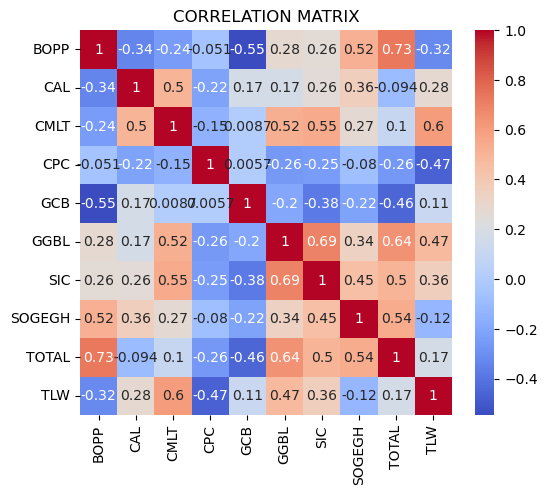

In [52]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(portfolio1.corr(), annot=True, cmap='coolwarm')
plt.title('CORRELATION MATRIX')
plt.show()

In [53]:
portfolio.describe()

,BOPP,CAL,CMLT,CPC,GCB,GGBL,SIC,SOGEGH,TOTAL,TLW
count,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000
mean,5.509359,0.859675,0.114283,0.019842,4.413200,2.276591,0.196726,0.937862,4.537858,18.795186
std,4.488406,0.218686,0.017242,0.004622,0.632758,1.089418,0.112157,0.320383,1.786241,8.905228
min,2.000000,0.420000,0.090000,0.010000,2.950000,0.900000,0.070000,0.570000,1.970000,11.920000
25%,2.850000,0.740000,0.100000,0.020000,3.950000,1.600000,0.100000,0.730000,3.000000,11.920000
50%,4.100000,0.840000,0.110000,0.020000,4.413200,2.050000,0.150000,0.840000,4.250000,11.940000
75%,6.340000,0.990000,0.120000,0.020000,4.950000,2.550000,0.260000,1.030000,5.457500,27.880000
max,22.000000,1.970000,0.160000,0.030000,5.850000,6.200000,0.520000,2.400000,9.500000,36.000000
